In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from surprise import Dataset, Reader, BaselineOnly
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.prediction_algorithms.algo_base import AlgoBase
from surprise.model_selection import cross_validate
from tqdm import tqdm

In [2]:
rating = pd.read_csv("ratings.csv")
tag = pd.read_csv("tags.csv")
movie = pd.read_csv("movies.csv")
link = pd.read_csv("links.csv")

In [3]:
rating

,Unnamed: 0,userId,movieId,rating,timestamp
0,0,496,112852,3.0,1415520462
1,1,391,1947,4.0,1030945141
2,2,387,1562,1.5,1095041022
3,3,474,2716,4.5,1053020930
4,4,483,88125,4.5,1311337237
...,...,...,...,...,...
100831,100831,469,1219,4.0,965661925
100832,100832,599,3571,2.0,1498511343
100833,100833,414,276,3.0,961596299
100834,100834,395,168,3.0,841503984


# Question 1A

In [4]:
user_num = len(set(rating["userId"]))
movie_num = len(set(rating["movieId"]))
rating_num = len(rating["rating"])

In [5]:
sparsity = rating_num / (movie_num*user_num)
print("Sparsity is", sparsity)

Sparsity is 0.016999683055613623


# Question 1B

Text(0.5, 1.0, 'Frequency of the Rating Values')

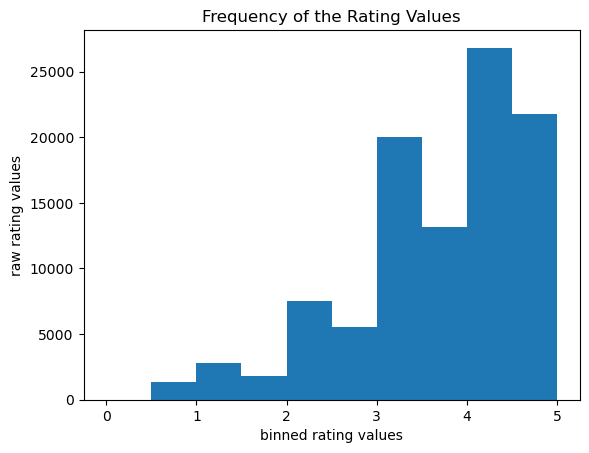

In [6]:
bins = np.linspace(0,5,num=11)
rating_value = rating["rating"]
plt.hist(rating_value, bins=bins)
plt.xlabel("binned rating values")
plt.ylabel("raw rating values")
plt.title("Frequency of the Rating Values")

## Shape of the raw rating values approximately have trend of increasing but non-monotonically. 

# Question 1C

Text(0.5, 1.0, 'Distribution of Ratings Received Among Movies')

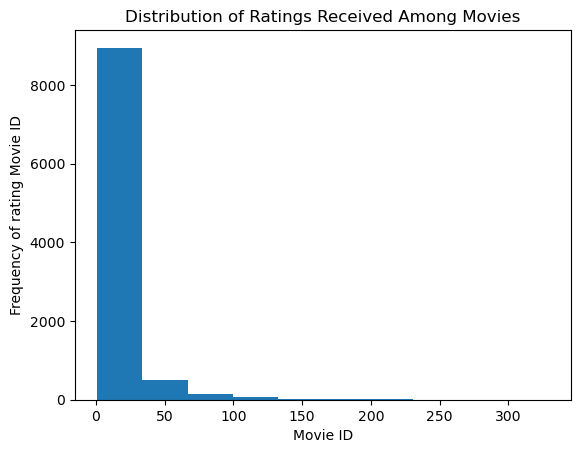

In [7]:
movie_index = rating["movieId"]
counter = Counter(movie_index)
counter_dec = sorted(list(counter.values()), reverse=True)
plt.hist(counter_dec)
plt.xlabel("Movie ID")
plt.ylabel("Frequency of rating Movie ID")
plt.title("Distribution of Ratings Received Among Movies")

# Question 1D

Text(0.5, 1.0, 'Distribution of Ratings Received Among Users')

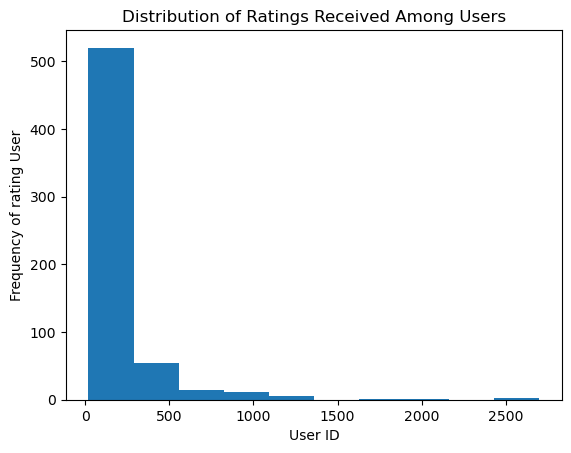

In [8]:
user_index = rating["userId"]
counter_user = Counter(user_index)
counter_dec_user = sorted(list(counter_user.values()), reverse=True)
plt.hist(counter_dec_user)
plt.xlabel("User ID")
plt.ylabel("Frequency of rating User")
plt.title("Distribution of Ratings Received Among Users")

# Question 1E
## Distribution of both graphs have decreasing trend. Both of them have high frequency low movie ID and user ID. It shows that more lower movie ID was rated and people has low user ID rate more movie than high user ID. 

# Question 1F

In [9]:
rating_value = rating[["rating", "movieId"]]
vars_value = rating_value.groupby(['movieId']).var()
vars_value

,rating
movieId,
1,0.696990
2,0.777419
3,1.112651
4,0.726190
5,0.822917
...,...
193581,NaN
193583,NaN
193585,NaN


Text(0.5, 1.0, 'variance of the rating values received by each movie')

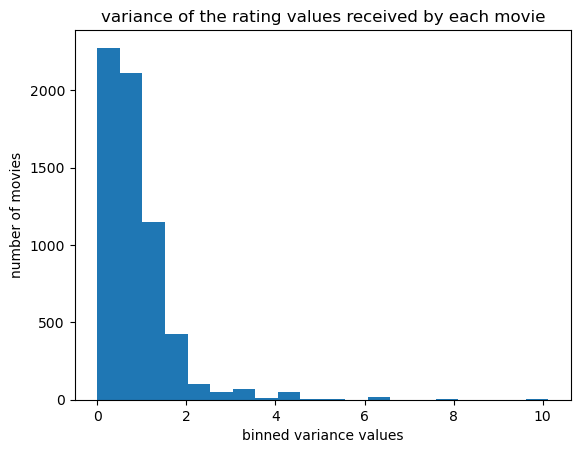

In [10]:
plt.hist(vars_value, bins=20)
plt.xlabel("binned variance values")
plt.ylabel("number of movies")
plt.title("variance of the rating values received by each movie")

## The shape of the variance plot has a decreasing trend. Most of the variance values focus on interval 0 to 2. After variance value=2, there's not too many movies. 

# Q3

# Q4

In [11]:
reader = Reader(line_format="user item rating timestamp", sep=",",rating_scale=(0.5,5),skip_lines=1)
data_rating = Dataset.load_from_file("ratings.csv", reader=reader)

In [12]:
df_q4=pd.DataFrame()
temp = {}

In [ ]:
the = cross_validate(KNNWithMeans(sim_options={'name':'pearson'},k=4,verbose=True),data_rating,cv=10)

In [ ]:
# for x in tqdm(range(2,102,2)):
#     the = cross_validate(KNNWithMeans(sim_options={'name':'pearson'},k=x),data_rating,cv=10)
#     temp[x]=the
#     row1 = {
#     "k": x,
#     "Average_Rmse": np.mean(the["test_rmse"]),
#     "Average_Mae": np.mean(the["test_mae"])
#     }
#     df_q4 = df_q4.append(row1, ignore_index=True)

In [ ]:
# row1 = {
#     "clus_name": "AgglomerativeClustering with n_cluster=20",
#     "reducer_name": "None",
#     "r_n_components": 5,
#     "Homogeneity": homogeneity_score(data_train.target,temp.labels_),
#     "Completeness": completeness_score(data_train.target,temp.labels_),
#     "V-measure": v_measure_score(data_train.target,temp.labels_),
#     "Adjusted Rand Index": adjusted_rand_score(data_train.target,temp.labels_),
#     "Adjusted mutual information score": adjusted_mutual_info_score(data_train.target,temp.labels_),
#     "Average": ((homogeneity_score(data_train.target,temp.labels_)+
#                  completeness_score(data_train.target,temp.labels_)+
#                  v_measure_score(data_train.target,temp.labels_)+
#                  adjusted_rand_score(data_train.target,temp.labels_)+
#                   adjusted_mutual_info_score(data_train.target,temp.labels_))/5),
# }
# df_q17 = df_q17.append(row1, ignore_index=True)